## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
primary_data = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID','Mouse ID'])
# Display the data table for preview
primary_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
mouse_count = primary_data['Mouse ID'].unique()
print(len(mouse_count))


249


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = primary_data.loc[primary_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicate_mice_df = pd.DataFrame(duplicate_mice)
duplicate_mice_df





,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_data = primary_data[primary_data['Mouse ID'] != 'g989']
new_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
mouse_count = new_mouse_data['Mouse ID'].unique()
print(len(mouse_count))

248


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_mean = new_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mouse_median = new_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
mouse_var = new_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
mouse_std = new_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
mouse_sem = new_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

summary_table = pd.DataFrame({'Mean Tumor Volume': mouse_mean, 'Median Tumor Volume': mouse_median, 
                                   'Tumor Volume Variance': mouse_var, 'Tumor Volume Std. Dev.': mouse_std, 
                                    'Tumor Volume Std. Err.': mouse_sem,})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,52.431737,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_stats_line = new_mouse_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median', 'sem', 'std', 'var']})

mouse_stats_line

Tumor Volume (mm3)                                          
                           mean     median       sem       std        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin              52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol             52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril              55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol              54.331565  52.509285  0.596466  8.134708  66.173479
Placebo               54.033581  52.288934  0.581331  7.821003  61.168083
Propriva              52.320930  50.446266  0.544332  6.622085  43.852013
Ramicane              40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn              54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol             53.236507  51.818479  0.516398  6.966589  48.533355

## Bar and Pie Charts

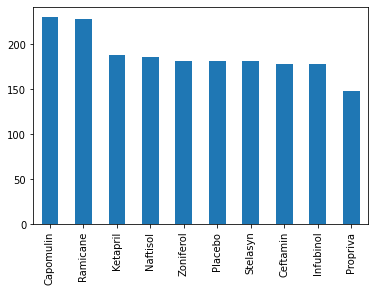

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_tested= new_mouse_data['Drug Regimen'].value_counts()

drug_tested.plot.bar()


plt.show()

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
number_of_mice= len(mouse_count)
drugs_tested= new_mouse_data['Drug Regimen'].unique()

x_axis = np.arange(len(drugs_tested))



plt.bar(x_axis, number_of_mice, color='r', alpha=0.5, align="center")

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
